## HANDLINNG MISSING VALUE ON DATASET TITANIC

In [1]:
import seaborn as sns

### Load the dataset


In [2]:
df = sns.load_dataset('titanic')

### Simple look of dataset


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

terlihat disini, jika misalkan kita menghapus missing value atau nilai yang kosong tersebut, maka data kita akan banyak terhapus dan membuat data kita menjadi sedikit, ini tidak direkomendasikan kecuali data kalian memang banyak, mungkin sebanyak 10000 dan lain-lain.


## IMPUTATION MEAN

### 1. Mean value imputation
ini adalah cara untuk mengisi missing value atau nilai yang kosong menggunakan rata rata dari kolom data tersebut.

In [9]:
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [10]:
df[['age_mean', 'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: ylabel='Count'>

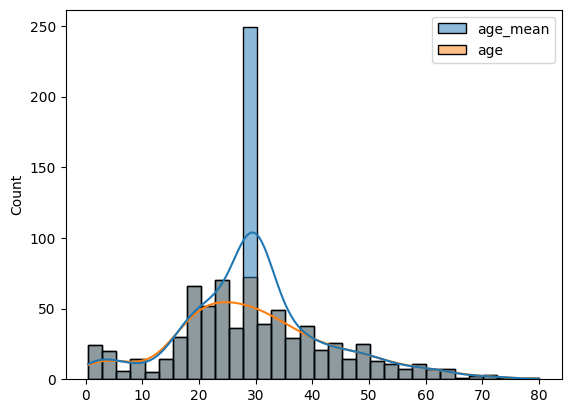

In [16]:
sns.histplot(df[['age_mean', 'age']], kde=True)

### 2. Median Value Imputaions - If we have Outlier

In [22]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [24]:
df[['age_median', 'age_mean', 'age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### 3. Mode Imputation technique - Categorical Value

In [25]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [50]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [51]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [52]:
df[['embarked', 'embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [55]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [56]:
df['embarked'].isnull().sum()

np.int64(2)